# Por que as vendas caíram?

## Contexto
Este projeto analisa dados fictícios de vendas com o objetivo de
identificar possíveis causas para a queda observada no período analisado.

## Perguntas que quero responder
- Quando a queda começou?
- As vendas caíram em volume, valor ou ambos?
- A queda é geral ou concentrada por categoria ou região?
- O desconto está impactando negativamente a receita?


IMPORTAÇÂO DAS BIBLIOTECAS

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

IMPORTAÇÂO DO DATASET

In [2]:
 tabela_vendas = pd.read_csv("/content/drive/MyDrive/projeto-queda-vendas/dados-vendas/sales_data.csv")

display(tabela_vendas)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


DIAGNÓSTICO BRUTO DO DATASET

In [3]:
tabela_vendas = pd.read_csv("/content/drive/MyDrive/projeto-queda-vendas/dados-vendas/sales_data.csv")

tabela_vendas.shape

(1000, 14)

In [4]:
tabela_vendas = pd.read_csv("/content/drive/MyDrive/projeto-queda-vendas/dados-vendas/sales_data.csv")

tabela_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [5]:
tabela_vendas = pd.read_csv("/content/drive/MyDrive/projeto-queda-vendas/dados-vendas/sales_data.csv")

tabela_vendas.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


### CRIAÇÂO DE UMA TABELA MENSAL

PREPARAR A COLUNA DE DATA

In [6]:
tabela_vendas["Sale_Date"] = pd.to_datetime(tabela_vendas["Sale_Date"])
tabela_vendas.dtypes

,0
Product_ID,int64
Sale_Date,datetime64[ns]
Sales_Rep,object
Region,object
Sales_Amount,float64
Quantity_Sold,int64
Product_Category,object
Unit_Cost,float64
Unit_Price,float64
Customer_Type,object


FILTRAR 2024

In [7]:
tabela_vendas = tabela_vendas[tabela_vendas["Sale_Date"].dt.year == 2023]


CRIAR A COLUNA DE MÊS

In [8]:
tabela_vendas["AnoMes"] = tabela_vendas["Sale_Date"].dt.to_period("M")


SOMAR VENDAS POR MÊS

In [9]:
vendas_mensais = (
    tabela_vendas
        .groupby("AnoMes")
        .agg(
            receita_total=("Sales_Amount", "sum"),
            unidades_totais=("Quantity_Sold", "sum"),
            preco_medio=("Unit_Price", "mean")
        )
        .reset_index()
)

vendas_mensais


,AnoMes,receita_total,unidades_totais,preco_medio
0,2023-01,476092.36,2472,2914.791500
1,2023-02,368919.36,2064,2610.790533
2,2023-03,402638.77,2069,2800.217375
3,2023-04,438992.61,1977,2799.195185
4,2023-05,389078.76,1968,2929.405833
5,2023-06,418458.34,2276,2737.277283
6,2023-07,374242.88,1603,2850.357353
7,2023-08,443171.28,2336,2765.507634
8,2023-09,367837.60,1815,2530.013971
9,2023-10,460378.78,2386,2743.478636


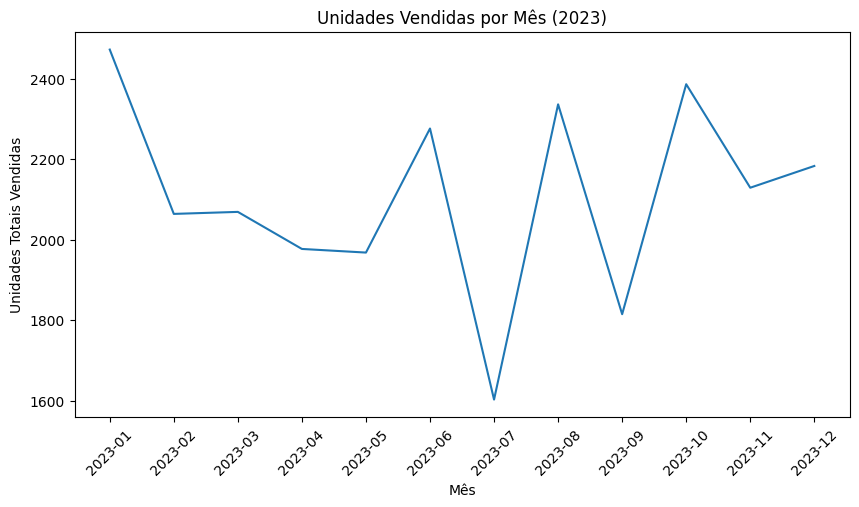

In [25]:
# Gráfico de unidades totais por mês
plt.figure(figsize=(10,5))

plt.plot(
    vendas_mensais["AnoMes"].astype(str),
    vendas_mensais["unidades_totais"]
)

plt.title("Unidades Vendidas por Mês (2023)")
plt.xlabel("Mês")
plt.ylabel("Unidades Totais Vendidas")
plt.xticks(rotation=45)

plt.show()


### TESTE DE QUEDA POR REGIÃO

Objetivo:
Descobrir se a queda de julho veio de alguma região específica.

In [11]:
vendas_por_regiao_mes = (
    tabela_vendas
        .groupby(["AnoMes", "Region"])
        .agg(
            unidades_totais=("Quantity_Sold", "sum"),
            receita_total=("Sales_Amount", "sum")
        )
        .reset_index()
)

comparacao_jun_jul = vendas_por_regiao_mes[
    vendas_por_regiao_mes["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ])
]

comparacao_jun_jul


,AnoMes,Region,unidades_totais,receita_total
20,2023-06,East,589,95497.11
21,2023-06,North,638,126768.33
22,2023-06,South,529,110467.52
23,2023-06,West,520,85725.38
24,2023-07,East,438,106338.56
25,2023-07,North,486,124987.19
26,2023-07,South,310,68641.22
27,2023-07,West,369,74275.91


### QUEDA % POR REGIÃO (JUN → JUL)

Objetivo:
Ver qual região realmente “quebrou” proporcionalmente.

In [12]:
# Separar junho e julho
junho = vendas_por_regiao_mes[vendas_por_regiao_mes["AnoMes"] == pd.Period("2023-06", freq="M")]
julho = vendas_por_regiao_mes[vendas_por_regiao_mes["AnoMes"] == pd.Period("2023-07", freq="M")]

# Juntar lado a lado por região
comparacao = junho.merge(
    julho,
    on="Region",
    suffixes=("_jun", "_jul")
)

# Calcular queda absoluta e percentual
comparacao["queda_unidades"] = comparacao["unidades_totais_jun"] - comparacao["unidades_totais_jul"]
comparacao["queda_percentual"] = (
    comparacao["queda_unidades"] / comparacao["unidades_totais_jun"]
) * 100

comparacao.sort_values("queda_percentual", ascending=False)


,AnoMes_jun,Region,unidades_totais_jun,receita_total_jun,AnoMes_jul,unidades_totais_jul,receita_total_jul,queda_unidades,queda_percentual
2,2023-06,South,529,110467.52,2023-07,310,68641.22,219,41.398866
3,2023-06,West,520,85725.38,2023-07,369,74275.91,151,29.038462
0,2023-06,East,589,95497.11,2023-07,438,106338.56,151,25.636672
1,2023-06,North,638,126768.33,2023-07,486,124987.19,152,23.824451


### QUEDA POR CATEGORIA (Sul, JUN → JUL)

---



Objetivo: Descobrir qual categoria derrubou as vendas no Sul.

In [13]:
# Filtrar apenas região Sul
vendas_sul = tabela_vendas[tabela_vendas["Region"] == "South"]

# Agrupar por mês e categoria
unidades_categoria_mes = (
    vendas_sul
        .groupby(["AnoMes", "Product_Category"])
        .agg(
            unidades_totais=("Quantity_Sold", "sum"),
            receita_total=("Sales_Amount", "sum")
        )
        .reset_index()
)

# Comparar junho e julho
comparacao_categoria = unidades_categoria_mes[
    unidades_categoria_mes["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ])
]

comparacao_categoria


,AnoMes,Product_Category,unidades_totais,receita_total
20,2023-06,Clothing,64,6607.47
21,2023-06,Electronics,122,35249.81
22,2023-06,Food,117,18625.85
23,2023-06,Furniture,226,49984.39
24,2023-07,Clothing,45,18082.22
25,2023-07,Electronics,105,18942.49
26,2023-07,Food,69,13653.04
27,2023-07,Furniture,91,17963.47


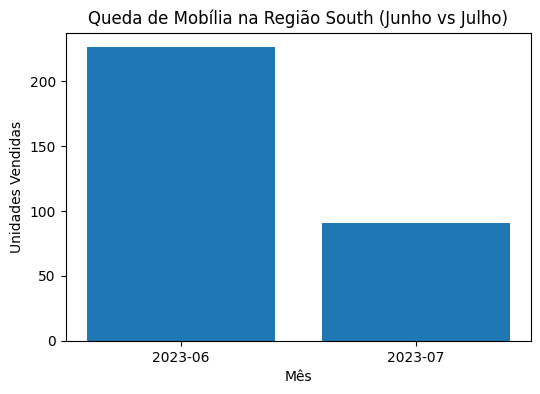

In [26]:
# Dados de Mobília no South (Junho vs Julho)
mobilia_south_jun_jul = mobilia_south.groupby("AnoMes").agg(
    unidades_totais=("Quantity_Sold", "sum")
).reset_index()

plt.figure(figsize=(6,4))

plt.bar(
    mobilia_south_jun_jul["AnoMes"].astype(str),
    mobilia_south_jun_jul["unidades_totais"]
)

plt.title("Queda de Mobília na Região South (Junho vs Julho)")
plt.xlabel("Mês")
plt.ylabel("Unidades Vendidas")

plt.show()


### Conclusão do Diagnóstico

O gráfico confirma que a queda de Julho/2023 não foi generalizada em todas as categorias, mas altamente concentrada na categoria **Mobília (Furniture)** dentro da região **South**.

A redução de aproximadamente **60% nas unidades vendidas** ocorreu em paralelo a um aumento relevante no **preço médio** da categoria, enquanto o desconto permaneceu praticamente estável.

Esses resultados sugerem que o aumento de preço (ou mudança no mix de produtos) foi um fator central para a queda de demanda no período.


QUEDA % POR CATEGORIA

In [14]:
junho_cat = comparacao_categoria[comparacao_categoria["AnoMes"] == pd.Period("2023-06", freq="M")]
julho_cat = comparacao_categoria[comparacao_categoria["AnoMes"] == pd.Period("2023-07", freq="M")]

queda_categoria = junho_cat.merge(
    julho_cat,
    on="Product_Category",
    suffixes=("_jun", "_jul")
)

queda_categoria["queda_unidades"] = (
    queda_categoria["unidades_totais_jun"] - queda_categoria["unidades_totais_jul"]
)

queda_categoria["queda_percentual"] = (
    queda_categoria["queda_unidades"] / queda_categoria["unidades_totais_jun"]
) * 100

queda_categoria.sort_values("queda_percentual", ascending=False)


,AnoMes_jun,Product_Category,unidades_totais_jun,receita_total_jun,AnoMes_jul,unidades_totais_jul,receita_total_jul,queda_unidades,queda_percentual
3,2023-06,Furniture,226,49984.39,2023-07,91,17963.47,135,59.734513
2,2023-06,Food,117,18625.85,2023-07,69,13653.04,48,41.025641
0,2023-06,Clothing,64,6607.47,2023-07,45,18082.22,19,29.687500
1,2023-06,Electronics,122,35249.81,2023-07,105,18942.49,17,13.934426


### Queda por representante dentro de Mobília no South

Objetivo: Descobrir se foi um vendedor ou canal específico

In [16]:
# Filtrar apenas South + categoria Mobília
mobilia_sul = tabela_vendas[
    (tabela_vendas["Region"] == "South") &
    (tabela_vendas["Product_Category"] == "Furniture")
]

# Agrupar por mês e representante
vendas_rep_mes = (
    mobilia_sul
    .groupby(["AnoMes", "Sales_Rep"])
    .agg(
        unidades_totais=("Quantity_Sold", "sum"),
        receita_total=("Sales_Amount", "sum")
    )
    .reset_index()
)

# Filtrar apenas Junho e Julho
jun_jul = vendas_rep_mes[
    vendas_rep_mes["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ])
]


In [17]:
# Transformar em tabela alinhada mês a mês
comparacao = jun_jul.pivot(
    index="Sales_Rep",
    columns="AnoMes",
    values="unidades_totais"
).fillna(0)

# Criar coluna de queda (Julho - Junho)
comparacao["queda_unidades"] = (
    comparacao[pd.Period("2023-07", freq="M")] -
    comparacao[pd.Period("2023-06", freq="M")]
)

# Ordenar do que mais caiu para o que menos caiu
comparacao.sort_values("queda_unidades")


AnoMes,2023-06,2023-07,queda_unidades
Sales_Rep,,,
David,111.0,0.0,-111.0
Bob,58.0,16.0,-42.0
Alice,38.0,32.0,-6.0
Charlie,6.0,0.0,-6.0
Eve,13.0,43.0,30.0


In [18]:
# Ver todas as vendas do David em Junho e Julho (todas as categorias)

david_vendas = tabela_vendas[
    (tabela_vendas["Sales_Rep"] == "David") &
    (tabela_vendas["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ]))
]

david_vendas.groupby(["AnoMes", "Product_Category"]).agg(
    unidades_totais=("Quantity_Sold", "sum"),
    receita_total=("Sales_Amount", "sum")
).reset_index()


,AnoMes,Product_Category,unidades_totais,receita_total
0,2023-06,Clothing,162,23702.79
1,2023-06,Electronics,107,22948.81
2,2023-06,Food,8,7813.12
3,2023-06,Furniture,158,14769.75
4,2023-07,Clothing,96,38000.94
5,2023-07,Electronics,127,21943.06
6,2023-07,Food,65,17406.92
7,2023-07,Furniture,31,2150.05


desconto em Furniture

In [19]:
# Comparar descontos do David em Furniture entre Junho e Julho

david_furniture = tabela_vendas[
    (tabela_vendas["Sales_Rep"] == "David") &
    (tabela_vendas["Product_Category"] == "Furniture") &
    (tabela_vendas["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ]))
]

david_furniture.groupby("AnoMes").agg(
    unidades_totais=("Quantity_Sold", "sum"),
    receita_total=("Sales_Amount", "sum"),
    desconto_medio=("Discount", "mean"),
    preco_medio=("Unit_Price", "mean")
).reset_index()


,AnoMes,unidades_totais,receita_total,desconto_medio,preco_medio
0,2023-06,158,14769.75,0.1825,1862.075
1,2023-07,31,2150.05,0.0600,4880.800


comparar se foi somente com david ou em toda a região

In [20]:
# Comparar desconto e preço médio de Mobília no South (todos representantes)

mobilia_south = tabela_vendas[
    (tabela_vendas["Region"] == "South") &
    (tabela_vendas["Product_Category"] == "Furniture") &
    (tabela_vendas["AnoMes"].isin([
        pd.Period("2023-06", freq="M"),
        pd.Period("2023-07", freq="M")
    ]))
]

mobilia_south.groupby("AnoMes").agg(
    unidades_totais=("Quantity_Sold", "sum"),
    receita_total=("Sales_Amount", "sum"),
    desconto_medio=("Discount", "mean"),
    preco_medio=("Unit_Price", "mean")
).reset_index()


,AnoMes,unidades_totais,receita_total,desconto_medio,preco_medio
0,2023-06,226,49984.39,0.143333,2466.444444
1,2023-07,91,17963.47,0.140000,3331.775000


A partir deste ponto, recomenda-se investigar canais de venda e perfil de clientes para validar se o impacto foi causado por uma mudança comercial ou comportamental.
